### Student Information
Name: 周彥廷（Yves Chou）

Student ID: 110601043

GitHub ID: 209115202

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
# test code for environment setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly as py
import math

[nltk_data] Downloading package punkt to /Users/tingwei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 1.Load Data

In [2]:
DATA_PATH = "/Users/tingwei/Desktop/DM1/DM2025Labs/DM2025-Lab1-Exercise/newdataset/Reddit-stock-sentiment.csv"

df = pd.read_csv(DATA_PATH)

In [3]:
df.head(5)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [4]:
# Keep only ["type", "post_id", "subreddit", "title", "text", "upvotes", "label"]
cols = [c for c in ["type", "post_id", "subreddit", "title", "text", "upvotes", "label"] if c in df.columns]
df = df.loc[:, cols]

In [5]:
df.head(5)

,type,post_id,subreddit,title,text,upvotes,label
0,comment,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,Calls on retards,0,-1.0
1,comment,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Stunt as in like why did they even make a big ...,-15,0.0
2,comment,mmeevio,StockMarket,How do you feel about a sitting president maki...,Seeing lots of red in the ticker.,1,0.0
3,post,165kllm,stockstobuytoday,Who knows more? $VMAR,Vision Marine Technologies Inc. is rewriting t...,30,1.0
4,comment,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,He didn’t say thank you.,1,-1.0


In [6]:
df['label']

0     -1.0
1      0.0
2      0.0
3      1.0
4     -1.0
      ... 
842    1.0
843    0.0
844    0.0
845   -1.0
846    0.0
Name: label, Length: 847, dtype: float64

In [7]:
len(df)

847

## 2. EDA (for Task 3)

### (1) Basic Information & Disturbution

In [8]:
# Basic information
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nDtypes:\n", df.dtypes)

Shape: (847, 7)
Columns: ['type', 'post_id', 'subreddit', 'title', 'text', 'upvotes', 'label']

Dtypes:
 type          object
post_id       object
subreddit     object
title         object
text          object
upvotes        int64
label        float64
dtype: object


In [9]:
# Missing values and duplicates
print("\nMissing per column:\n", df.isna().sum())
print("\nTotal missing:", int(df.isna().sum().sum()))

if "post_id" in df.columns:
    n_dup_post = int(df.duplicated(subset=["post_id"]).sum())
    print("\nDuplicate post_id:", n_dup_post)



Missing per column:
 type         0
post_id      0
subreddit    0
title        0
text         0
upvotes      0
label        0
dtype: int64

Total missing: 0

Duplicate post_id: 0




> No Missing Value, nor Duplicate




In [10]:
df["title_text"] = (
    df.get("title","").astype(str) + " " + df.get("text","").astype(str)
).str.replace("\n"," ", regex=False).str.replace(r"\s+"," ", regex=True).str.strip()

In [11]:
# Text length stats
df["n_words"] = df["title_text"].str.split().str.len()
df["n_chars"] = df["title_text"].str.len()

print("\nText length (words/chars) describe:\n", df[["n_words","n_chars"]].describe().T)


Text length (words/chars) describe:
          count        mean         std   min   25%    50%    75%     max
n_words  847.0   36.153483   39.939819   4.0  16.0   25.0   41.0   492.0
n_chars  847.0  210.737898  238.703749  30.0  97.0  148.0  235.0  2779.0


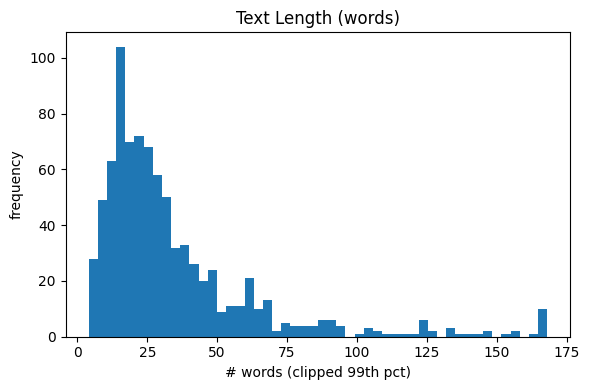

In [12]:
# Text length histogram (words, clipped at 99th pct to avoid long tail)
plt.figure(figsize=(6,4))
vals = df["n_words"].clip(upper=df["n_words"].quantile(0.99))
plt.hist(vals, bins=50)
plt.title("Text Length (words)")
plt.xlabel("# words (clipped 99th pct)")
plt.ylabel("frequency")
plt.tight_layout()
plt.show()

In [13]:
# Plot of label distribution
label_counts = df["label"].value_counts().sort_index()
label_props  = (label_counts / label_counts.sum()).round(4)
print("\nLabel counts:\n", label_counts)
print("\nLabel proportions:\n", label_props)


Label counts:
 label
-1.0    315
 0.0    423
 1.0    109
Name: count, dtype: int64

Label proportions:
 label
-1.0    0.3719
 0.0    0.4994
 1.0    0.1287
Name: count, dtype: float64


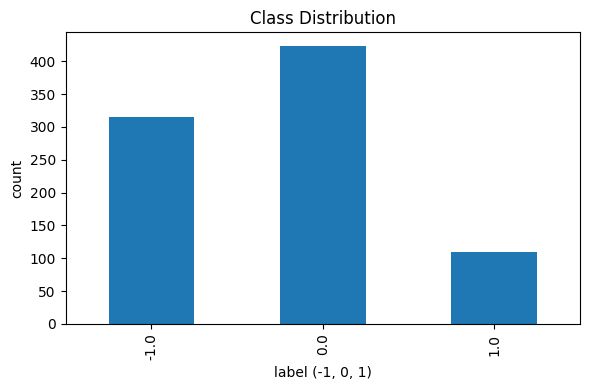

In [14]:
# Plot of label distribution
plt.figure(figsize=(6,4))
label_counts.plot(kind="bar")
plt.title("Class Distribution")
plt.xlabel("label (-1, 0, 1)")
plt.ylabel("count")
plt.tight_layout()
plt.show()

In [15]:
# Subreddit  distributions
top_sub = df["subreddit"].value_counts()
print("\nTop subreddits):\n", top_sub)


Top subreddits):
 subreddit
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64


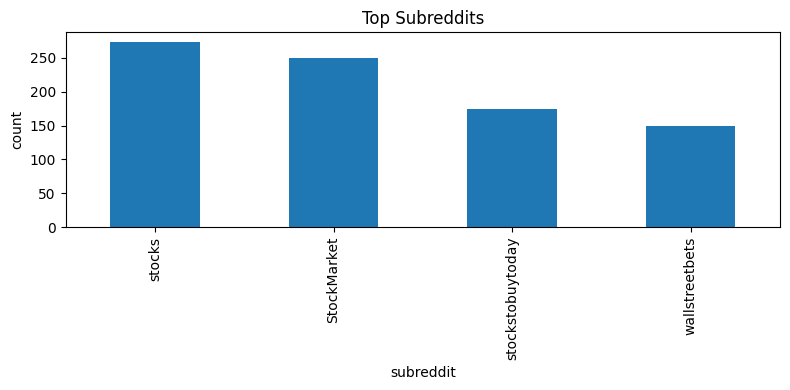

In [16]:
# Plot of Subreddit distributions
plt.figure(figsize=(8,4))
top_sub.plot(kind="bar")
plt.title("Top Subreddits")
plt.xlabel("subreddit")
plt.ylabel("count")
plt.tight_layout()
plt.show()

In [17]:
# Type distributions
type_counts = df["type"].value_counts()
print("\nType distribution:\n", type_counts)


Type distribution:
 type
comment    783
post        64
Name: count, dtype: int64


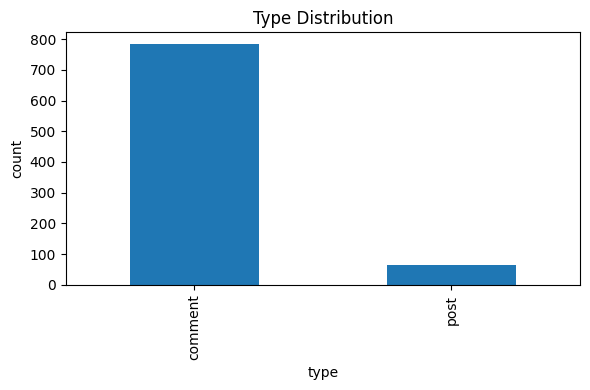

In [18]:
# Plot of type distributions
plt.figure(figsize=(6,4))
type_counts.plot(kind="bar")
plt.title("Type Distribution")
plt.xlabel("type")
plt.ylabel("count")
plt.tight_layout()
plt.show() # Imbalanced

In [19]:
# Upvotes summary
print("\nUpvotes describe:\n", pd.to_numeric(df['upvotes'], errors='coerce').describe())


Upvotes describe:
 count     847.000000
mean       12.262102
std       142.126337
min       -74.000000
25%         1.000000
50%         1.000000
75%         4.000000
max      3943.000000
Name: upvotes, dtype: float64


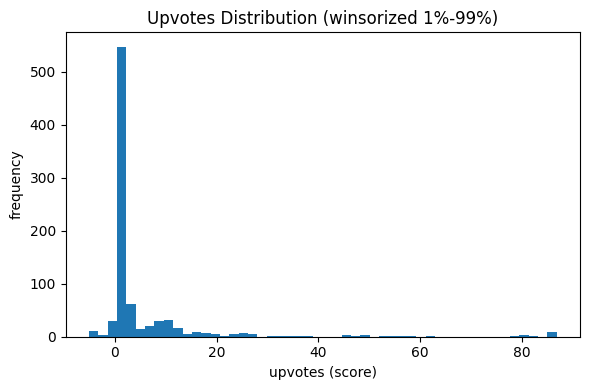

In [20]:
# Plot of upvotes distribution
plt.figure(figsize=(6,4))
v2 = df["upvotes"].dropna().clip(lower=df["upvotes"].quantile(0.01),upper=df["upvotes"].quantile(0.99))
plt.hist(v2, bins=50)
plt.title("Upvotes Distribution (winsorized 1%-99%)")
plt.xlabel("upvotes (score)")
plt.ylabel("frequency")
plt.tight_layout()
plt.show()

### (2) Advanced EDA


[4] Avg #words by label:
 label
-1.0    39.45
 0.0    33.45
 1.0    37.13
Name: n_words, dtype: float64


/var/folders/yc/hskfyjk12s9_04yg6kw3_ws00000gn/T/ipykernel_3389/618064010.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups_len, labels=[str(k) for k in sorted(df["label"].dropna().unique())], showfliers=False)


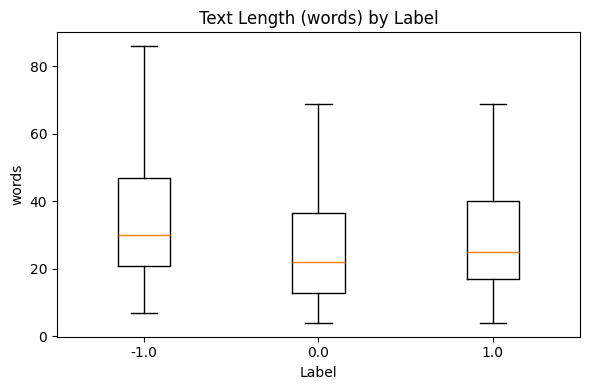

In [21]:
# Text length by Label (Mean + Boxplot)
len_mean = df.groupby("label")["n_words"].mean().sort_index()
print("\n[4] Avg #words by label:\n", len_mean.round(2))
groups_len = [df.loc[df["label"]==k, "n_words"].dropna().values for k in sorted(df["label"].dropna().unique())]
plt.figure(figsize=(6,4))
plt.boxplot(groups_len, labels=[str(k) for k in sorted(df["label"].dropna().unique())], showfliers=False)
plt.title("Text Length (words) by Label")
plt.xlabel("Label")
plt.ylabel("words")
plt.tight_layout()
plt.show()


[1] Median upvotes by label:
 label
-1.0    1.0
 0.0    1.0
 1.0    1.0
Name: upvotes, dtype: float64


/var/folders/yc/hskfyjk12s9_04yg6kw3_ws00000gn/T/ipykernel_3389/1754478814.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=[str(k) for k in sorted(df["label"].dropna().unique())], showfliers=False)


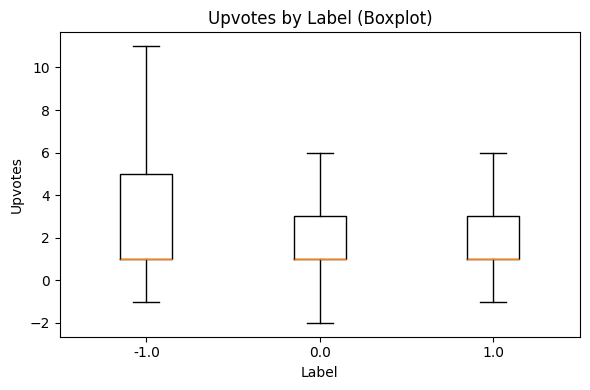

In [22]:
# Upvotes by label (Median + Boxplot)
med_up = df.groupby("label")["upvotes"].median().sort_index()
print("\n[1] Median upvotes by label:\n", med_up)
groups = [df.loc[df["label"]==k, "upvotes"].dropna().values for k in sorted(df["label"].dropna().unique())]
plt.figure(figsize=(6,4))
plt.boxplot(groups, labels=[str(k) for k in sorted(df["label"].dropna().unique())], showfliers=False)
plt.title("Upvotes by Label (Boxplot)")
plt.xlabel("Label")
plt.ylabel("Upvotes")
plt.tight_layout()
plt.show()


[8b] Label share by Type:
 label     -1.0    0.0    1.0
type                        
comment  0.401  0.467  0.132
post     0.016  0.891  0.094


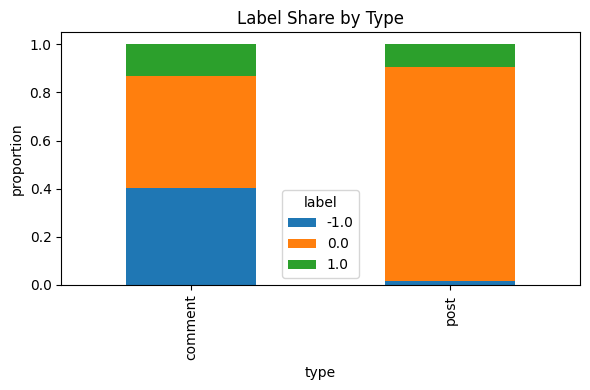

In [23]:
# Label mix by type
ct_type = pd.crosstab(df["type"], df["label"], normalize="index")
print("\n[8b] Label share by Type:\n", ct_type.round(3))
plt.figure(figsize=(6,4))
ct_type.plot(kind="bar", stacked=True, ax=plt.gca())
plt.title("Label Share by Type"); plt.xlabel("type"); plt.ylabel("proportion")
plt.tight_layout(); plt.show()


[5] Pearson r(upvotes, #words): 0.025


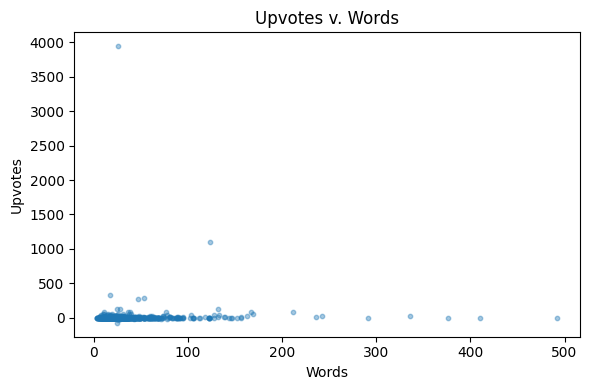

In [24]:
# Upvotes v. Text length (Correlation + Scatter)
m = df[["upvotes","n_words"]].dropna()
r = np.corrcoef(m["upvotes"], m["n_words"])[0,1] if len(m)>1 else np.nan
print(f"\n[5] Pearson r(upvotes, #words): {r:.3f}")
plt.figure(figsize=(6,4))
plt.scatter(m["n_words"], m["upvotes"], s=10, alpha=0.4)
plt.title("Upvotes v. Words")
plt.xlabel("Words")
plt.ylabel("Upvotes")
plt.tight_layout()
plt.show()

## 3. Data Preprocessing (for Task 2)

### (1) Missing Value

In [25]:
def check_missing_values(row):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in row:
        if element == True:
            counter+=1
    return ("The amoung of missing records is: ", counter)

In [26]:
df.replace(['NaN', 'None', ''], np.nan, inplace=True)
df.isnull()

,type,post_id,subreddit,title,text,upvotes,label,title_text,n_words,n_chars
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
842,False,False,False,False,False,False,False,False,False,False
843,False,False,False,False,False,False,False,False,False,False
844,False,False,False,False,False,False,False,False,False,False
845,False,False,False,False,False,False,False,False,False,False


In [27]:
check_missing_values(df)

('The amoung of missing records is: ', 0)

### (2) Dupicate

In [28]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844    False
845    False
846    False
Length: 847, dtype: bool

In [29]:
sum(df.duplicated())

0

### (3) Sampling

In [30]:
df_sample = df.sample(n=500) # random state

In [31]:
len(df_sample)

500

In [32]:
df_sample.head(5)

,type,post_id,subreddit,title,text,upvotes,label,title_text,n_words,n_chars
286,comment,mmknyjc,stocks,r/Stocks Daily Discussion & Fundamentals Frida...,All of Xi’s cadres have worked for decades in ...,3,-1.0,r/Stocks Daily Discussion & Fundamentals Frida...,49,297
421,post,1jo3zpc,stockstobuytoday,Stock Gainers for Today,Stocks that are trending up today\n\n [Popping...,1,0.0,Stock Gainers for Today Stocks that are trendi...,12,88
749,comment,mmkqdz5,StockMarket,Trump: We Are Doing Really Well On Our Tariff ...,This guy is doing the ultimate fake it until y...,1,-1.0,Trump: We Are Doing Really Well On Our Tariff ...,29,153
96,comment,mmo2f48,wallstreetbets,Someone post the hotline please.,200k loss in a month.. haha,1,-1.0,Someone post the hotline please. 200k loss in ...,11,60
266,comment,mmmrtzq,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,I am so addicted to this market I can't wait f...,22,1.0,Weekend Discussion Thread for the Weekend of A...,22,115


label
 0.0    423
-1.0    315
 1.0    109
Name: count, dtype: int64


<Axes: title={'center': 'Label distribution'}, xlabel='label'>

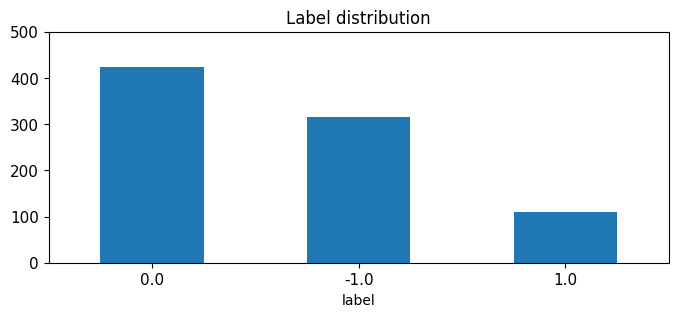

In [33]:
print(df.label.value_counts())

# plot barchart for df
df.label.value_counts().plot(kind = 'bar',
                             title = 'Label distribution',
                             ylim = [0, 500],
                             rot = 0, fontsize = 11, figsize = (8,3))

label
 0.0    252
-1.0    187
 1.0     61
Name: count, dtype: int64


<Axes: title={'center': 'Label distribution'}, xlabel='label'>

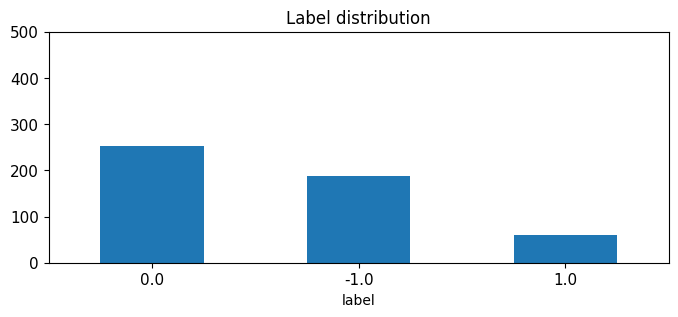

In [34]:
print(df_sample.label.value_counts())

# plot barchart for df
df_sample.label.value_counts().plot(kind = 'bar',
                                    title = 'Label distribution',
                                    ylim = [0, 500],
                                    rot = 0, fontsize = 11, figsize = (8,3))

In [35]:
df_com = pd.DataFrame({
    "df": df['label'].value_counts(),
    "df_sample": df_sample['label'].value_counts()
})
df_com = df_com.sort_values(by="label", ascending=False)

print(df_com)

        df  df_sample
label                
 1.0   109         61
 0.0   423        252
-1.0   315        187


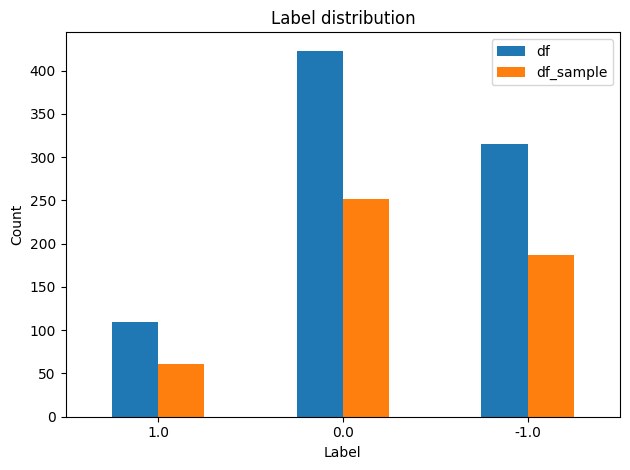

In [36]:
df_com.plot(kind="bar")
plt.title("Label distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

### (4) Feature Creation

In [37]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to /Users/tingwei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/tingwei/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [38]:
def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

In [39]:
df["title_text"] = (
    df["title"].astype(str).fillna("") + " " + df["text"].astype(str).fillna("")
).str.replace("\n", " ", regex=False).str.replace(r"\s+", " ", regex=True).str.strip()

In [40]:
df["unigrams"] = df["title_text"].apply(tokenize_text)

In [41]:
df.head(5)

,type,post_id,subreddit,title,text,upvotes,label,title_text,n_words,n_chars,unigrams
0,comment,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,Calls on retards,0,-1.0,Retardation is on the menu boys! WSB is so bac...,13,64,"[Retardation, is, on, the, menu, boys, !, WSB,..."
1,comment,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Stunt as in like why did they even make a big ...,-15,0.0,Retail giant TARGET has now declined for 10 co...,43,237,"[Retail, giant, TARGET, has, now, declined, fo..."
2,comment,mmeevio,StockMarket,How do you feel about a sitting president maki...,Seeing lots of red in the ticker.,1,0.0,How do you feel about a sitting president maki...,32,168,"[How, do, you, feel, about, a, sitting, presid..."
3,post,165kllm,stockstobuytoday,Who knows more? $VMAR,Vision Marine Technologies Inc. is rewriting t...,30,1.0,Who knows more? $VMAR Vision Marine Technologi...,163,1083,"[Who, knows, more, ?, $, VMAR, Vision, Marine,..."
4,comment,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,He didn’t say thank you.,1,-1.0,The Trump administration is begging Xi Jinping...,16,94,"[The, Trump, administration, is, begging, Xi, ..."


In [42]:
list(df[0:1]['unigrams'])

[['Retardation',
  'is',
  'on',
  'the',
  'menu',
  'boys',
  '!',
  'WSB',
  'is',
  'so',
  'back',
  'Calls',
  'on',
  'retards']]

In [43]:
# TF-IDF: class-indicative terms (top-10 per class, printed)
tv = TfidfVectorizer(lowercase=True, stop_words="english", token_pattern=r"(?u)\b[a-zA-Z][a-zA-Z]+\b", max_features=8000)
X_tfidf = tv.fit_transform(df["title_text"])
vocab = np.array(tv.get_feature_names_out())
print("\n[7] Class-indicative terms (top-10 by mean TF-IDF within class):")
for k in sorted(df["label"].dropna().unique()):
    mask = (df["label"]==k).values
    if mask.sum() == 0:
        continue
    mean_w = X_tfidf[mask].mean(axis=0).A1
    top = mean_w.argsort()[-10:][::-1]
    print(f" label={k}: ", ", ".join(vocab[top]))


[7] Class-indicative terms (top-10 by mean TF-IDF within class):
 label=-1.0:  trump, china, weekend, policy, just, tariff, president, tariffs, discussion, xi
 label=0.0:  trump, china, thread, tariff, market, stocks, weekend, daily, stock, data
 label=1.0:  weekend, good, silver, stocks, thread, discussion, doing, trump, just, policy


### (5) Feature subset selection

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.title_text)
print(df_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 11 stored elements and shape (1, 4508)>
  Coords	Values
  (0, 3364)	1
  (0, 2222)	2
  (0, 2806)	2
  (0, 3989)	1
  (0, 2559)	1
  (0, 634)	1
  (0, 4467)	1
  (0, 3673)	1
  (0, 465)	1
  (0, 722)	1
  (0, 3366)	1


In [45]:
count_vect.get_feature_names_out()[3364]

'retardation'

In [46]:
analyze = count_vect.build_analyzer()

In [47]:
analyze(df.title_text[0])

['retardation',
 'is',
 'on',
 'the',
 'menu',
 'boys',
 'wsb',
 'is',
 'so',
 'back',
 'calls',
 'on',
 'retards']

In [48]:
# Term-document matrix
df_counts.shape

(847, 4508)

In [49]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '04', '06', '08', '10'],
      dtype=object)

In [50]:
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [51]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [52]:
# Plot 20 Features
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [53]:
# Document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]

In [54]:
plot_z = df_counts[0:20, 0:20].toarray() # df_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

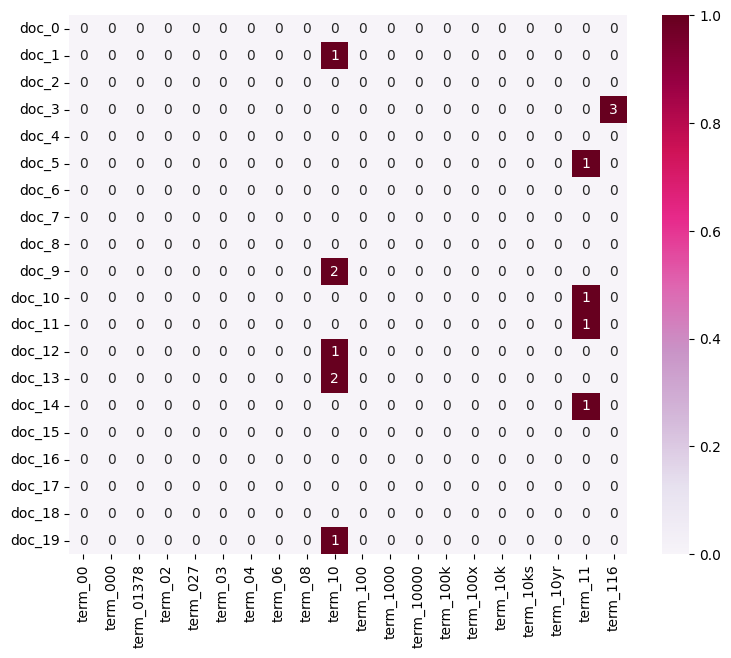

In [55]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

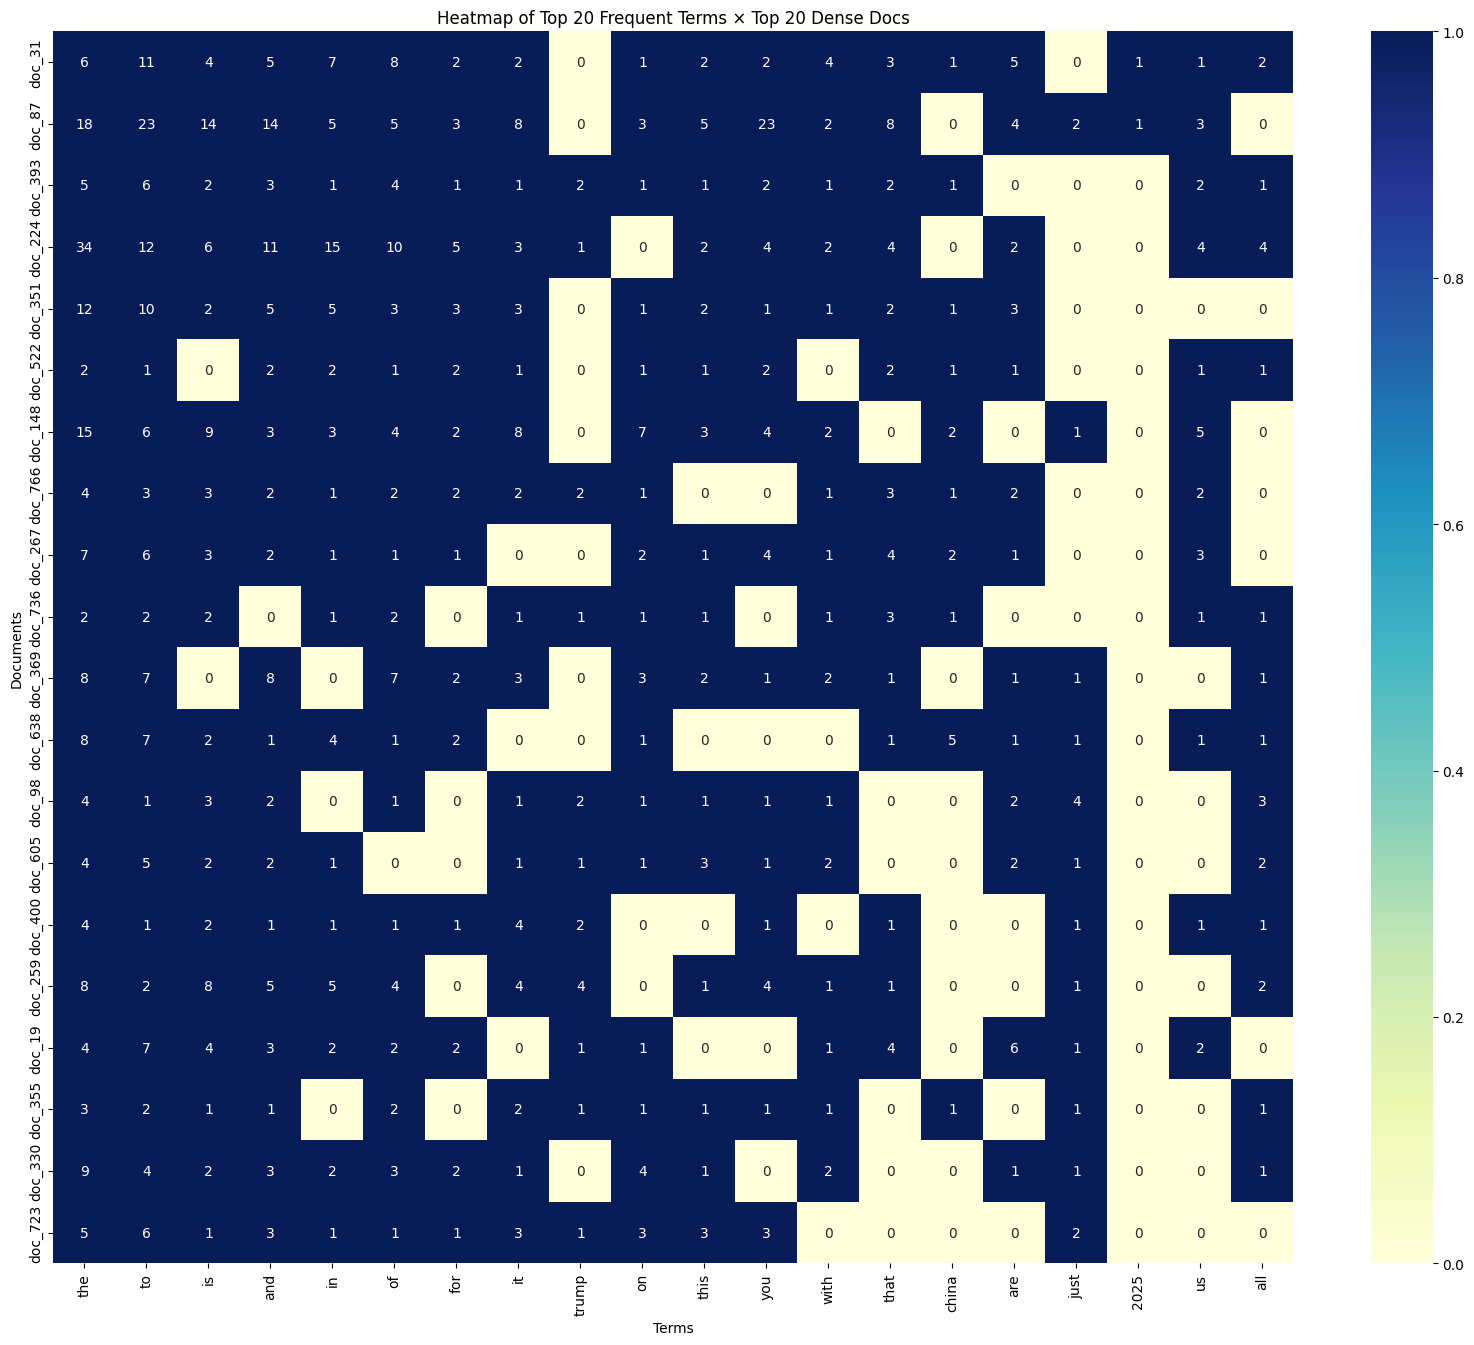

In [56]:
# Document Frequency (Top 20)
doc_freq = np.asarray((df_counts > 0).sum(axis=0)).ravel()
top_terms_idx = np.argsort(-doc_freq)[:20]
top_terms = count_vect.get_feature_names_out()[top_terms_idx]

# Documents with Terms (Top 20)
doc = np.asarray((df_counts[:, top_terms_idx] > 0).sum(axis=1)).ravel()
top_docs_idx = np.argsort(-doc)[:20]
top_docs = [f"doc_{i:02d}" for i in top_docs_idx]

# Sub-matrix
sub = df_counts[top_docs_idx][:, top_terms_idx].toarray()
df_sub = pd.DataFrame(sub, columns=top_terms, index=top_docs)

plt.figure(figsize=(20, 16))
sns.heatmap(df_sub, cmap="YlGnBu", vmin=0, vmax=1, annot=True, fmt=".0f")
plt.title("Heatmap of Top 20 Frequent Terms × Top 20 Dense Docs")
plt.xlabel("Terms")
plt.ylabel("Documents")
plt.xticks(rotation=90)
plt.show()

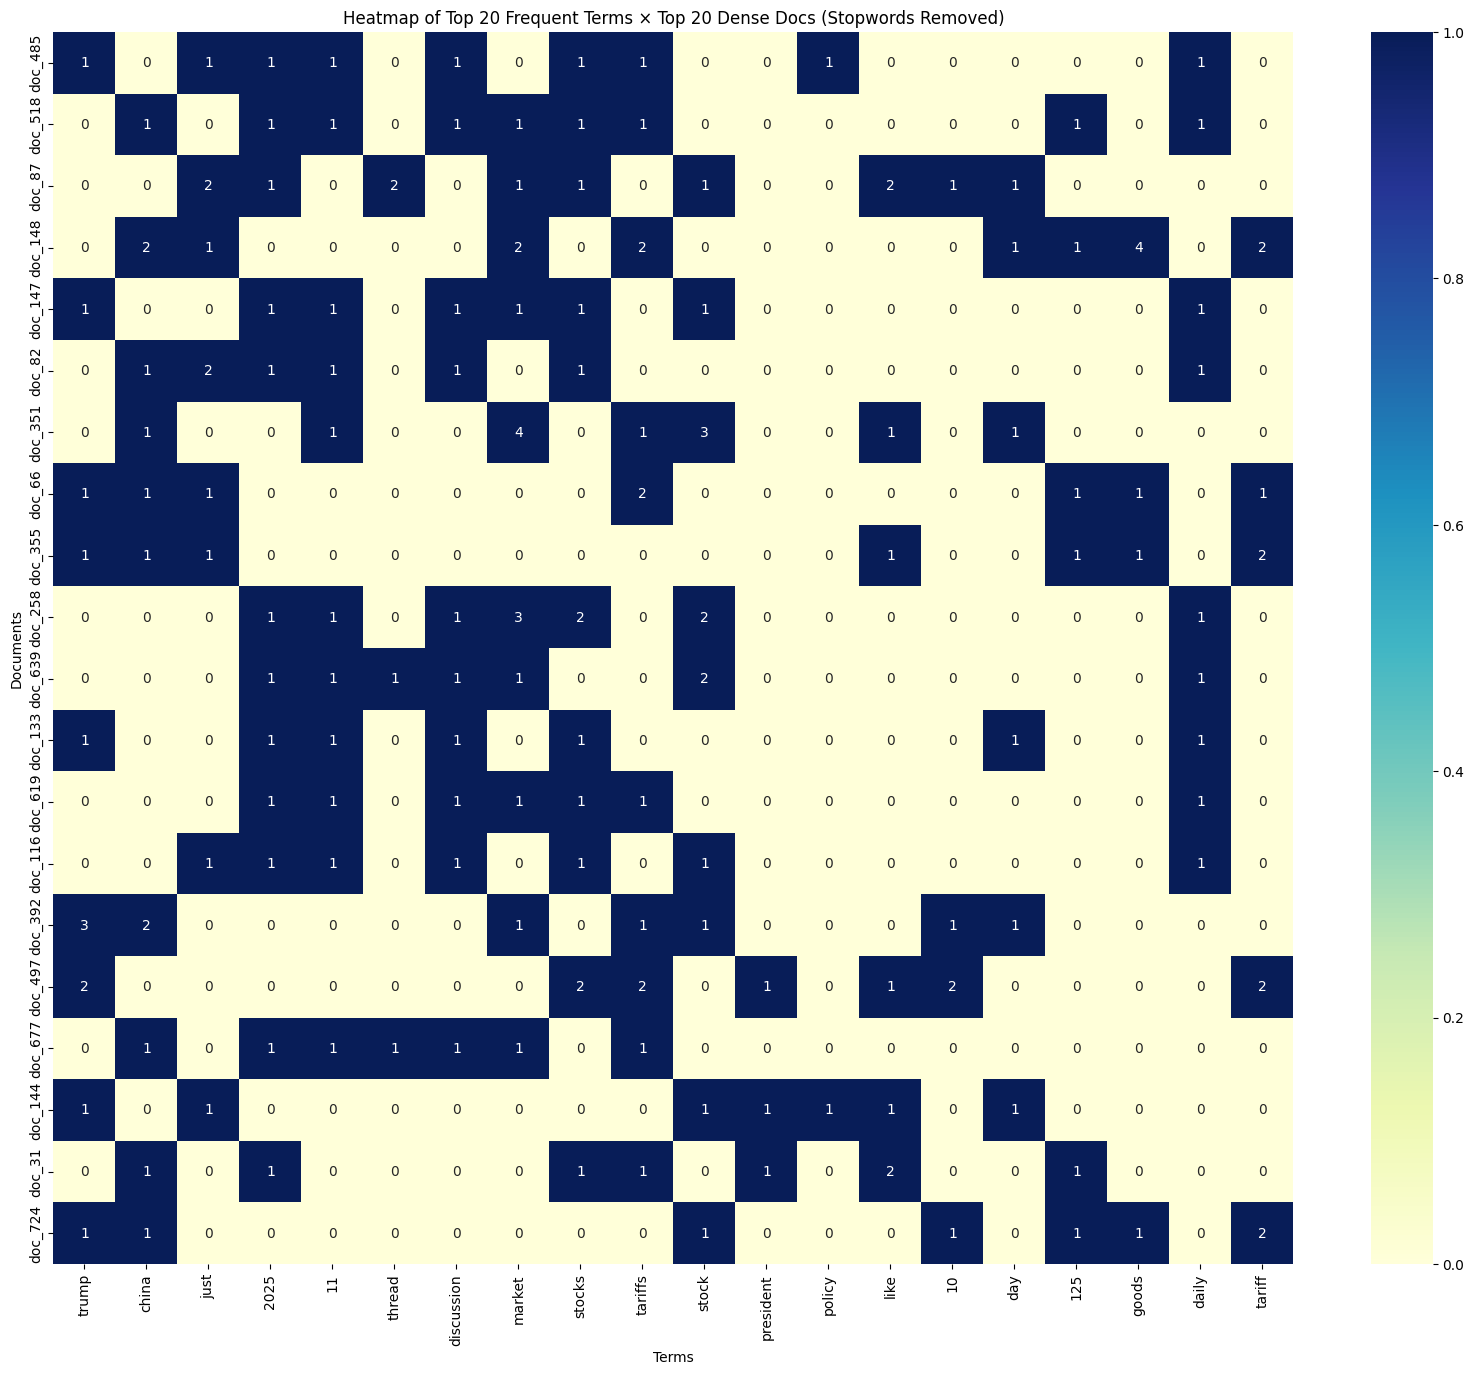

In [57]:
from sklearn.feature_extraction import text

# Filter StopWords
stop_words = set(text.ENGLISH_STOP_WORDS)
terms = np.array(count_vect.get_feature_names_out())
mask = [t not in stop_words for t in terms]
df_counts_nostop = df_counts[:, mask]
terms_nostop = terms[mask]

# Document Frequency (Top 20) after removing stopwords
doc_freq = np.asarray((df_counts_nostop > 0).sum(axis=0)).ravel()
top_terms_idx = np.argsort(-doc_freq)[:20]
top_terms = terms_nostop[top_terms_idx]

# Documents with Terms (Top 20)
doc = np.asarray((df_counts_nostop[:, top_terms_idx] > 0).sum(axis=1)).ravel()
top_docs_idx = np.argsort(-doc)[:20]
top_docs = [f"doc_{i:02d}" for i in top_docs_idx]

# Sub-matrix
sub = df_counts_nostop[top_docs_idx][:, top_terms_idx].toarray()
df_sub = pd.DataFrame(sub, columns=top_terms, index=top_docs)

# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df_sub, cmap="YlGnBu", vmin=0, vmax=1, annot=True, fmt=".0f")
plt.title("Heatmap of Top 20 Frequent Terms × Top 20 Dense Docs (Stopwords Removed)")
plt.xlabel("Terms")
plt.ylabel("Documents")
plt.xticks(rotation=90)
plt.show()

### (6) Attribute Transformation / Aggregation

In [58]:
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

In [59]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [60]:
term_frequencies[0] # Sum of first term: 00

np.int64(4)

/var/folders/yc/hskfyjk12s9_04yg6kw3_ws00000gn/T/ipykernel_3389/39301305.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)


[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '01378'),
 Text(3, 0, '02'),
 Text(4, 0, '027'),
 Text(5, 0, '03'),
 Text(6, 0, '04'),
 Text(7, 0, '06'),
 Text(8, 0, '08'),
 Text(9, 0, '10'),
 Text(10, 0, '100'),
 Text(11, 0, '1000'),
 Text(12, 0, '10000'),
 Text(13, 0, '100k'),
 Text(14, 0, '100x'),
 Text(15, 0, '10k'),
 Text(16, 0, '10ks'),
 Text(17, 0, '10yr'),
 Text(18, 0, '11'),
 Text(19, 0, '116'),
 Text(20, 0, '118'),
 Text(21, 0, '12'),
 Text(22, 0, '1242'),
 Text(23, 0, '125'),
 Text(24, 0, '12855584'),
 Text(25, 0, '13'),
 Text(26, 0, '14'),
 Text(27, 0, '140'),
 Text(28, 0, '145'),
 Text(29, 0, '14th'),
 Text(30, 0, '15'),
 Text(31, 0, '150'),
 Text(32, 0, '153'),
 Text(33, 0, '15m'),
 Text(34, 0, '16'),
 Text(35, 0, '160'),
 Text(36, 0, '17'),
 Text(37, 0, '1700'),
 Text(38, 0, '1728'),
 Text(39, 0, '17th'),
 Text(40, 0, '18'),
 Text(41, 0, '186'),
 Text(42, 0, '18630'),
 Text(43, 0, '1870'),
 Text(44, 0, '1934'),
 Text(45, 0, '1945'),
 Text(46, 0, '1947'),
 Text(47, 0, 

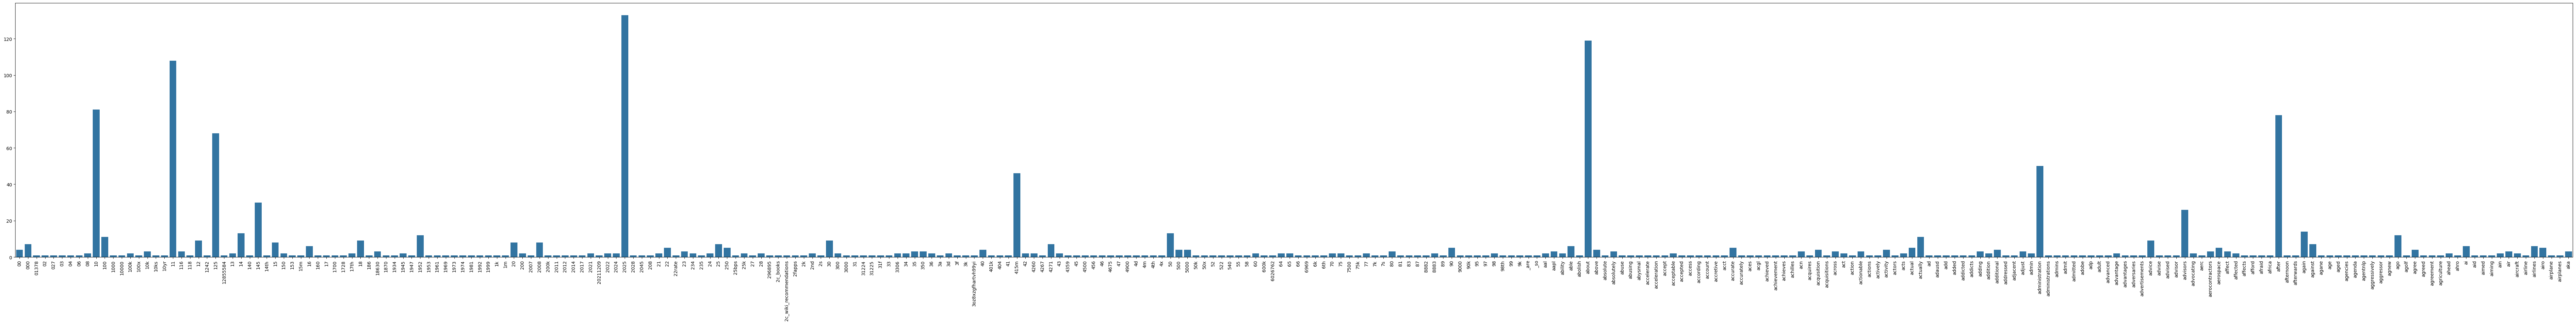

In [61]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

In [62]:
import plotly.express as px

df_plot = pd.DataFrame({
    "term": count_vect.get_feature_names_out()[:300],
    "frequency": term_frequencies[:300]
})

fig = px.bar(df_plot, x="term", y="frequency")
fig.update_xaxes(tickangle=90)
fig.show()

In [63]:
# Term Frequency
K = 100
term_freq = np.asarray(df_counts.sum(axis=0)).ravel()
topk_idx = np.argpartition(-term_freq, kth=K-1)[:K]
topk_idx = topk_idx[np.argsort(-term_freq[topk_idx])]
terms = count_vect.get_feature_names_out()[topk_idx]
vals = term_freq[topk_idx]

df_plot = pd.DataFrame({
    "term": terms,
    "frequency": vals
})

fig = px.bar(df_plot, x="term", y="frequency")
fig.update_xaxes(tickangle=90)
fig.show()

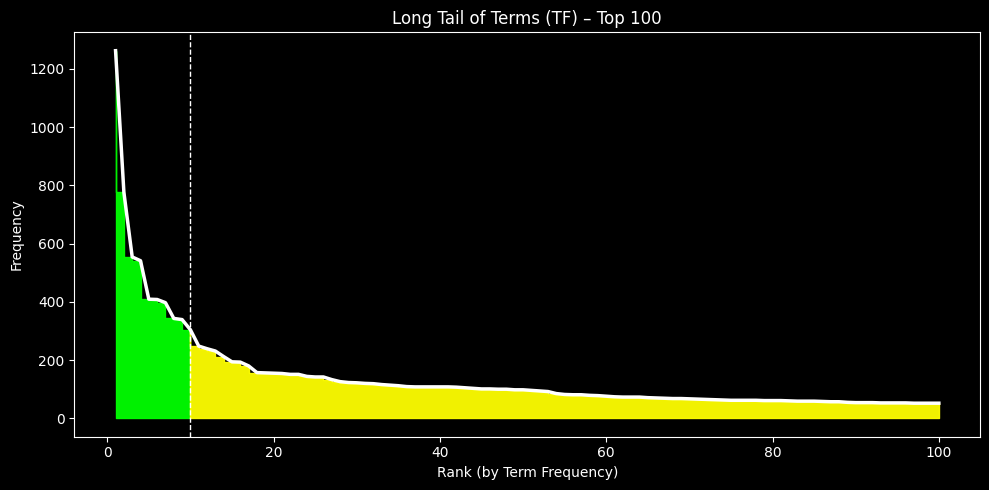

In [64]:
# Term Frequency & Long-Tail Effect
K = 100
term_freq = np.asarray(df_counts.sum(axis=0)).ravel()
topk_idx = np.argpartition(-term_freq, kth=K-1)[:K]
topk_idx = topk_idx[np.argsort(-term_freq[topk_idx])]
vals = term_freq[topk_idx]
vals = np.sort(vals)[::-1]

# Ranks
ranks = np.arange(1, len(vals) + 1)

# Head & Tail cutoff
head_frac = 0.1
cutoff = max(1, int(len(vals) * head_frac))

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
fig.patch.set_facecolor("black")
ax.set_facecolor("black")

ax.plot(ranks, vals, color="white", linewidth=2.5)
ax.fill_between(ranks[:cutoff], vals[:cutoff], step="pre", color="lime", alpha=0.95)
ax.fill_between(ranks[cutoff-1:], vals[cutoff-1:], step="pre", color="yellow", alpha=0.95)
ax.axvline(cutoff, linestyle="--", color="white", linewidth=1)

ax.text(int(cutoff*0.40), vals[0]*0.82, "Head", fontsize=12, color="black")
ax.text(int(cutoff + (len(vals)-cutoff)*0.15),
        vals[cutoff]*0.92, "Long tail", fontsize=12, color="black")

ax.set_xlabel("Rank (by Term Frequency)", color="white")
ax.set_ylabel("Frequency", color="white")
ax.set_title(f"Long Tail of Terms (TF) – Top {K}", color="white")

for spine in ax.spines.values():
    spine.set_color("white")
ax.tick_params(colors="white")

plt.tight_layout()
plt.show()

In [65]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/var/folders/yc/hskfyjk12s9_04yg6kw3_ws00000gn/T/ipykernel_3389/1516414146.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '01378'),
 Text(3, 0, '02'),
 Text(4, 0, '027'),
 Text(5, 0, '03'),
 Text(6, 0, '04'),
 Text(7, 0, '06'),
 Text(8, 0, '08'),
 Text(9, 0, '10'),
 Text(10, 0, '100'),
 Text(11, 0, '1000'),
 Text(12, 0, '10000'),
 Text(13, 0, '100k'),
 Text(14, 0, '100x'),
 Text(15, 0, '10k'),
 Text(16, 0, '10ks'),
 Text(17, 0, '10yr'),
 Text(18, 0, '11'),
 Text(19, 0, '116'),
 Text(20, 0, '118'),
 Text(21, 0, '12'),
 Text(22, 0, '1242'),
 Text(23, 0, '125'),
 Text(24, 0, '12855584'),
 Text(25, 0, '13'),
 Text(26, 0, '14'),
 Text(27, 0, '140'),
 Text(28, 0, '145'),
 Text(29, 0, '14th'),
 Text(30, 0, '15'),
 Text(31, 0, '150'),
 Text(32, 0, '153'),
 Text(33, 0, '15m'),
 Text(34, 0, '16'),
 Text(35, 0, '160'),
 Text(36, 0, '17'),
 Text(37, 0, '1700'),
 Text(38, 0, '1728'),
 Text(39, 0, '17th'),
 Text(40, 0, '18'),
 Text(41, 0, '186'),
 Text(42, 0, '18630'),
 Text(43, 0, '1870'),
 Text(44, 0, '1934'),
 Text(45, 0, '1945'),
 Text(46, 0, '1947'),
 Text(47, 0, 

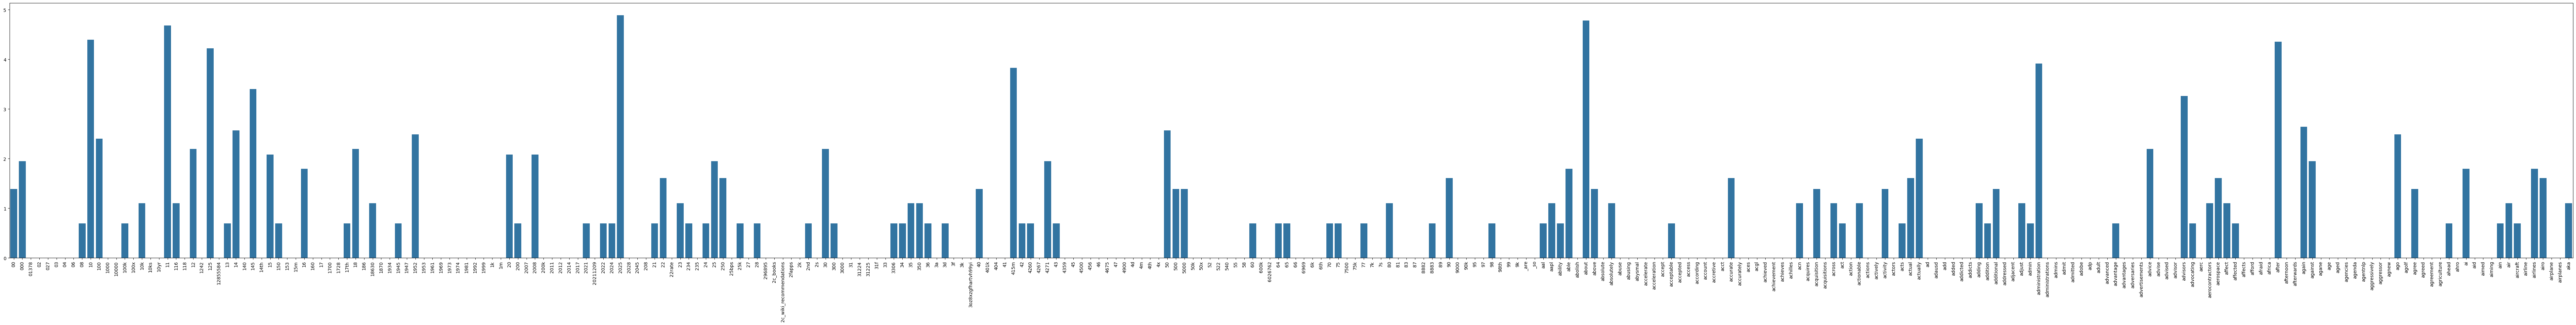

In [66]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

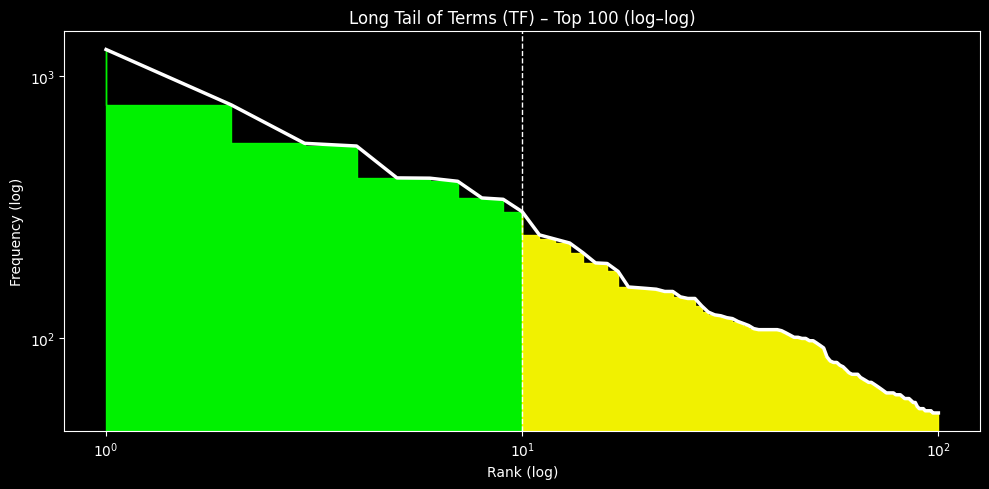

In [67]:
# Term Frequency & Long-Tail Effect(log–log version)
fig, ax = plt.subplots(figsize=(10, 5))
fig.patch.set_facecolor("black")
ax.set_facecolor("black")

ax.plot(ranks, vals, color="white", linewidth=2.5)
ax.fill_between(ranks[:cutoff], vals[:cutoff], step="pre", color="lime", alpha=0.95)
ax.fill_between(ranks[cutoff-1:], vals[cutoff-1:], step="pre", color="yellow", alpha=0.95)

ax.axvline(cutoff, linestyle="--", color="white", linewidth=1)

ax.text(int(cutoff*0.6), vals[0]*0.8, "Head", fontsize=12, color="black")
ax.text(int(cutoff*1.5), vals[cutoff]*0.9, "Long tail", fontsize=12, color="black")

# Switching to log–log scale
ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel("Rank (log)", color="white")
ax.set_ylabel("Frequency (log)", color="white")
ax.set_title(f"Long Tail of Terms (TF) – Top {K} (log–log)", color="white")

for spine in ax.spines.values():
    spine.set_color("white")
ax.tick_params(colors="white")

plt.tight_layout()
plt.show()

# Phase 2

In [ ]:
### Begin Assignment Here